In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels as arima ## For Arima modeling 

In [2]:
file_path = "data\CMO-Historical-Data-Monthly.xlsx"




df = pd.read_excel(file_path, sheet_name='Monthly Prices', skiprows=4, engine='openpyxl')  
# print(df.head())



xls = pd.ExcelFile(file_path, engine='openpyxl')
# print(df.isnull().sum())
# To check for null or missing data

df.rename(columns={"Unnamed: 0": "Year"}, inplace=True)

df = df.drop([0, 1])
# Droped the names of $\bbl

df.replace('…', pd.NA, inplace=True)
# Alot of dotted values (missing) replaced with NA
df.fillna(method='bfill', inplace=True) # backward filling the missing values of coal in Australia and South Africa
# df.fillna(0,inplace=True)

print(df.head(10))

# print(xls.sheet_names)
# To List all sheet names  

       Year  Crude oil, average  Crude oil, Brent  Crude oil, Dubai  \
2   1960M01                1.63              1.63              1.63   
3   1960M02                1.63              1.63              1.63   
4   1960M03                1.63              1.63              1.63   
5   1960M04                1.63              1.63              1.63   
6   1960M05                1.63              1.63              1.63   
7   1960M06                1.63              1.63              1.63   
8   1960M07                1.63              1.63              1.63   
9   1960M08                1.63              1.63              1.63   
10  1960M09                1.63              1.63              1.63   
11  1960M10                1.63              1.63              1.63   

    Crude oil, WTI  Coal, Australian  Coal, South African **  Natural gas, US  \
2             35.3               7.8                   29.34             0.14   
3             35.3               7.8                   2

C:\Users\pc\AppData\Local\Temp\ipykernel_9836\3541343255.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('…', pd.NA, inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_9836\3541343255.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True) # backward filling the missing values of coal in Australia and South Africa
C:\Users\pc\AppData\Local\Temp\ipykernel_9836\3541343255.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_sil

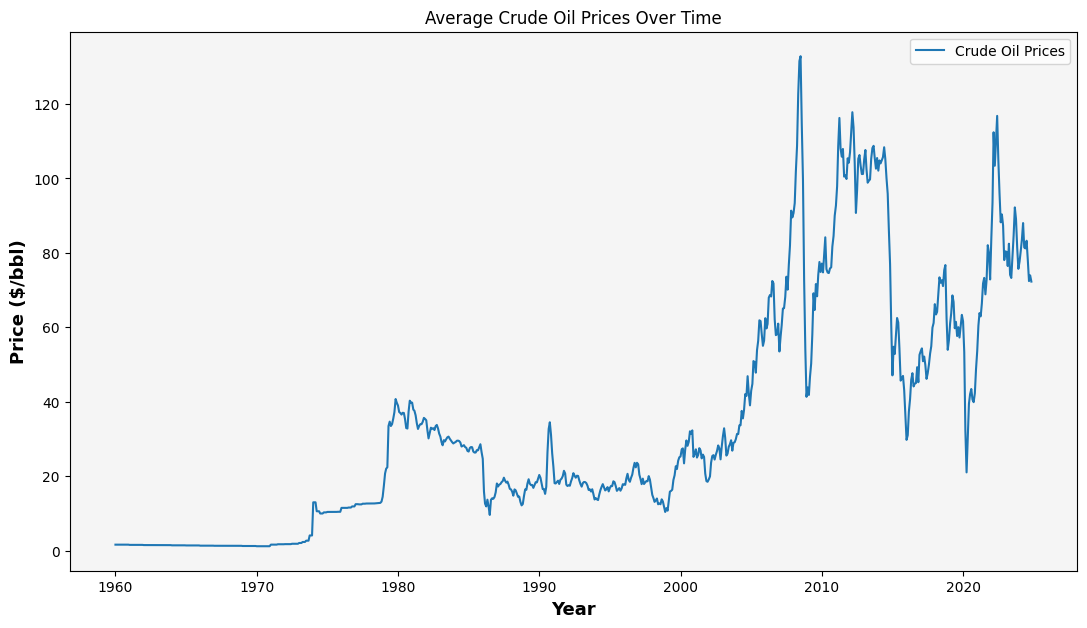

In [3]:
# print(df.columns)
# print(df.info())
df['Date'] = pd.to_datetime(df['Year'], format='%YM%m') # Convert it to time instead of just shwoing numbers
df.set_index('Date', inplace=True) # Set Date column as index
plt.figure(figsize=(13,7))
plt.plot(df['Crude oil, average'], label='Crude Oil Prices')
plt.title('Average Crude Oil Prices Over Time')
plt.xlabel('Year', fontweight = 'bold', fontsize = '13')
plt.ylabel('Price ($/bbl)', fontweight = 'bold', fontsize = '13')
plt.legend()
plt.gca().set_facecolor('whitesmoke')